In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model 
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay

In [31]:
red=np.random.uniform(6,10,size=20).reshape([-1,1])
blue=np.random.uniform(0,4,size=20).reshape([-1,1])
X=np.vstack([red,blue]) #create X values

In [40]:
ones=np.ones(20,dtype=int)
zeros=np.zeros(20,dtype=int)
Y=np.hstack([ones,zeros]) #create Y values

In [ ]:
color=["blue","red"]
color=list(map(lambda y:color[y],Y))

In [ ]:
Xdf=pd.DataFrame(X)
Ydf=pd.DataFrame(Y)
colordf=pd.DataFrame(color)
df=pd.concat([Xdf,Ydf,colordf],axis=1)
df.columns=["X","Y","color"]
#df

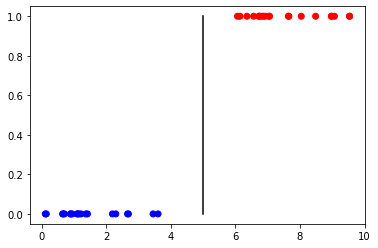

In [ ]:
t=5
plt.scatter(df["X"],df["Y"],color=df["color"])
plt.plot([t,t],[0,1],color="black")
plt.show()

In [ ]:
def Calc_tpRate(t):
  return len(list(filter(lambda x:x>t,red)))/20

def Calc_fpRate(t):
  return len(list(filter(lambda x:x>t,blue)))/20

In [34]:
Calc_tpRate(t)

1.0

In [ ]:
[Calc_tpRate(5),Calc_fpRate(5)]


[1.0, 0.0]

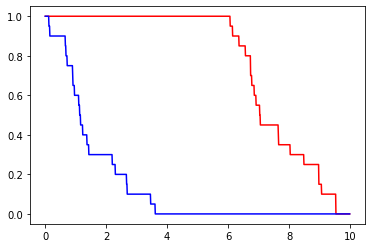

In [ ]:
thresholds=np.arange(0,10,.01)
tpR=list(map(lambda t:Calc_tpRate(t),thresholds))
fpR=list(map(lambda t:Calc_fpRate(t),thresholds))
plt.plot(thresholds,tpR,color="red")
plt.plot(thresholds,fpR,color="blue")
plt.show()

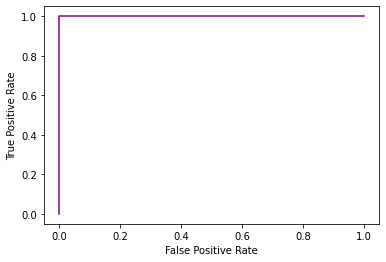

In [ ]:
#ROC CURVE
plt.plot(fpR,tpR,color="purple")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
regr =linear_model.LogisticRegression()
regr.fit(X,Y)

LogisticRegression()

In [ ]:
intercept=regr.intercept_[0]
slope=regr.coef_[0][0]

threshold=-intercept/slope

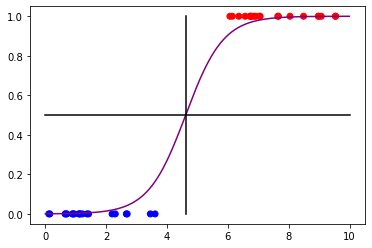

In [ ]:
x=np.arange(0,10,.01)

#sigmoid
y=slope*x+intercept
plt.plot(x,np.exp(y)/(1+np.exp(y)),color="purple")

#dots
plt.scatter(df["X"],df["Y"],color=df["color"])

#horizontal line
plt.plot([0,10],[.5,.5],color="black")

#formula for threshold is found by finding x where y=0
Calc_threshold=-intercept/slope

#vertical line
plt.plot([Calc_threshold,Calc_threshold],[0,1],color="black")
plt.show()

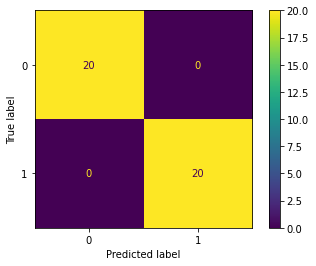

In [ ]:
ConfusionMatrixDisplay.from_estimator(regr,X,Y)
plt.show()

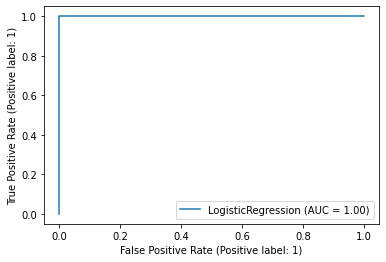

In [ ]:
RocCurveDisplay.from_estimator(regr,X,Y)
plt.show()